# 1. Linear regression
$$h_{\vec{\theta}}(\vec{x}^{(i)})=\vec{\theta}\ dot \ \vec{x}^{(i)} + b$$
## Cost Function
$$J(\vec{\theta}) = \frac{1}{2m} \sum_{i=1}^{n}(h_{\vec{\theta}}(\vec{x}^{(i)})-\vec{y}^{(i)})^2$$


In [5]:
import numpy as np

In [6]:
## 导入一组样本数据
data = np.loadtxt('/home/leleyang/cs229/coursera-ml-py-sj/machine-learning-ex1/ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]

In [7]:
# 对X进行预处理(末尾增加全1一列)
X = np.c_[X, np.ones(len(X))]

In [8]:
# 多元线性方程实现如下
def hTheta(theta, X):
    return np.dot(X, theta)

In [9]:
# Cost Function实现如下
def costFunction(theta, X, y):
    cost = np.sum((hTheta(theta, X) - y))**2/(2*len(X))
    return cost

## Gradient Descent
这里将$\vec{x}$拓展值全为1的一列作为与b相乘的向量，这样使得b可以作为$\vec{\theta}$的一部分进行更新，其更新公式如下：
$$J(\vec{\theta})' = \frac{1}{m}(h_{\vec{\theta}}(\vec{x}^{(i)})-\vec{y}^{(i)})\ dot\ \vec{x}^{(i)}$$
$$\vec{\theta} = \vec{\theta} - J(\vec{\theta})'$$

In [10]:
# 梯度计算如下
def getGradient(theta, X, y):
    grad = X.T @ (hTheta(theta, X) - y)/len(X)
    return grad

In [11]:
## 计算示例
theta = np.zeros(len(X[0]))
theta

array([0., 0., 0.])

In [12]:
print(f'初始cost: {costFunction(theta, X, y)}')
print(f'初始grad: {getGradient(theta, X, y)}')

初始cost: 2723198301766.2236
初始grad: [-7.64209128e+08 -1.12036770e+06 -3.40412660e+05]


## 特征归一化
根据以上结果可以看出，由于X与y数量级的不同，梯度与损失的计算结果数值很大，需要小心调整超参数才能使得模型最终收敛，因此这里引入特征归一化使得模型的输入与输出均满足均值0方差1，分布在(-1, 1)区间内


In [13]:
X = X[:, 0:2]
# 特征归一化
mu_x, std_x = np.mean(X, 0), np.std(X, 0, ddof=1)
# ddof=0计算总体标准差，ddof=1计算样本标准差

In [14]:
mu_x, std_x

(array([2000.68085106,    3.17021277]),
 array([7.94702354e+02, 7.60981887e-01]))

In [15]:
X = (X-mu_x)/std_x 

In [16]:
X = np.c_[X, np.ones(len(X))]

In [17]:
print(f'初始cost: {costFunction(theta, X, y)}')
print(f'初始grad: {getGradient(theta, X, y)}')

初始cost: 2723198301766.2236
初始grad: [-104632.93376618  -54123.68384408 -340412.65957447]


## 特征工程
倘若非线性，考虑用现有特征构造新特征进行拟合，例如
$$h_{\vec{\theta}}(\vec{X}^{(i)}) = \theta_1 \ dot \ \vec{X}^{(i)} + \theta_2 \ dot \ {\vec{X}^{(i)}}^2$$
*具体构造视情况而定，逻辑回归lab中有一个构造的范例*

## 图像的绘制
本部分出现过的图像有：
- 2d样本点图
- 2d回归线+样本点图
下面一一进行绘制

In [18]:
import matplotlib.pyplot as plt

In [19]:
## 这里选用一维线性回归数据
data_train = np.loadtxt('/home/leleyang/cs229/coursera-ml-py-sj/machine-learning-ex1/ex1data1.txt', delimiter=',', usecols=(0, 1))
X_train = data_train[:, 0]
y_train = data_train[:, 1]

In [20]:
## 2d样本点图
def plotData(X, y):
    plt.scatter(X, y, marker='x', c='r', label='Actual Values')
    plt.title('xxx')
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    plt.legend()

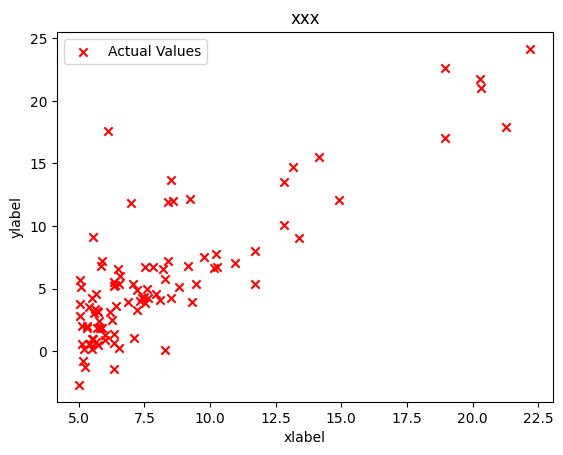

In [21]:
plotData(X_train, y_train)
plt.show()

## 进行梯度下降更新theta
不断更新theta，直到损失不再减小

In [22]:
X_train = np.c_[X_train, np.ones(len(X_train))]

In [23]:
theta_train = np.zeros(len(X_train[0]))

In [24]:
alpha = 1e-2
epochs = 100
show = epochs//10
for i in range(epochs):
    cost = costFunction(theta_train, X_train, y_train)
    grad = getGradient(theta_train, X_train, y_train)
    if i % show == 0:
        print(f'更新第{i}次，当前损失为{cost}，当前梯度为{grad}')
    theta_train -= alpha*grad

更新第0次，当前损失为1653.631660284588，当前梯度为[-65.32884975  -5.83913505]
更新第10次，当前损失为24.024424398746618，当前梯度为[-0.07070746  0.70381031]
更新第20次，当前损失为23.172984386715935，当前梯度为[-0.06944116  0.69122608]
更新第30次，当前损失为22.35170679969812，当前梯度为[-0.06819952  0.67886665]
更新第40次，当前损失为21.559536247996675，当前梯度为[-0.06698008  0.66672822]
更新第50次，当前损失为20.79544114434072，当前梯度为[-0.06578245  0.65480683]
更新第60次，当前损失为20.058426462114728，当前梯度为[-0.06460623  0.6430986 ]
更新第70次，当前损失为19.34753243960677，当前梯度为[-0.06345104  0.63159971]
更新第80次，当前损失为18.6618333301789，当前梯度为[-0.06231651  0.62030643]
更新第90次，当前损失为18.000436196733627，当前梯度为[-0.06120226  0.60921508]


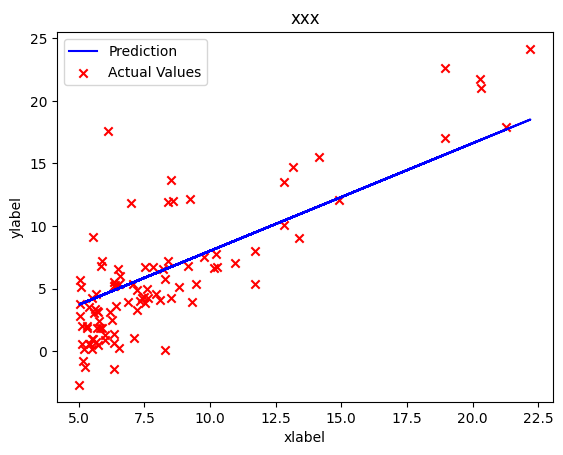

In [25]:
## 回归直线图
X_show = X_train[:, 0:1]
plt.plot(X_show, hTheta(theta_train, X_train), c='b', label = 'Prediction')
plotData(X_show, y_train)
plt.show()

# 2. logistic regression

## logistic regression model

$$h_\theta(x) = \frac{1}{1+e^{-\theta^Tx}}$$
称$g(x) = \frac{1}{1+e^{-x}}$为sigmoid函数，其取值范围在0~1区间，于是根据上式有$h_\theta(x) = g(\theta x)$

g(x) == 0.5时，x==0

其中$\vec{\theta}\ dot \ \vec{X} = \vec{\theta}_1 \ dot \ \vec{X}_1 + \vec{\theta}_2 \ dot \ \vec{X}_2 + ...$(线性多项式)

In [37]:
# sigmoid函数的实现
def sigmoid(x):
    return 1/(1+np.exp(-x))
# logistic regression model的实现
def logModel(theta, X):
    return sigmoid(X @ theta)

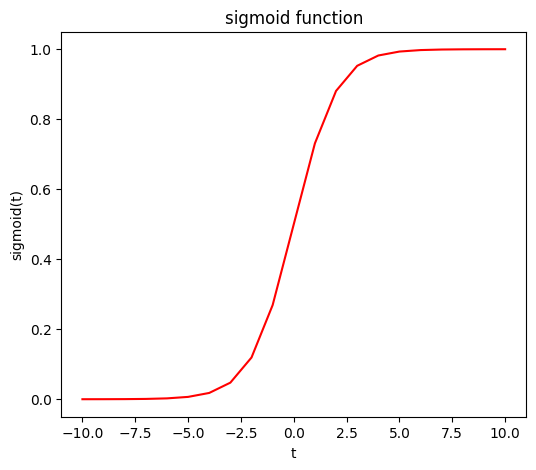

In [38]:
## 绘制sigmoid函数
t = np.arange(-10, 11)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(t, sigmoid(t), c='r')
ax.set(title='sigmoid function', xlabel='t', ylabel='sigmoid(t)')
plt.show()


## Cost function

这里用似然函数作为cost function，具体推理过程可见cs229

公式如下：

$$\begin{align} J(\theta) &= log\ L(\theta) \\ &= -\sum_{i=1}^m\{ y^{(i)}logh(x{(i)})+(1-y^{(i)})log(1-h(x^{(i)})) \} \end{align}$$

若使用正则化，则还要在末尾加上$\frac{\lambda}{2m}\sum_{i=2}^{n}{w^{(j)}}^2$(注意第一个项为常数项，不计入运算)

*加入正则项相当于减小了每次$\theta$应该更新的步长可以防止模型过拟合*

In [39]:
data = np.loadtxt('/home/leleyang/cs229/coursera-ml-py/machine-learning-ex2/ex2/ex2data2.txt', delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [88]:
## 绘制样本点
def logPlotData(X, y):
    pos = np.where(y==1)[0]
    neg = np.where(y==0)[0]
    plt.scatter(X[pos, 0], X[pos, 1], c='y', marker='o', label='Good')
    plt.scatter(X[neg, 0], X[neg, 1], marker='+', c='g', label='bad')
    plt.legend()

In [66]:
def costFunc(theta, X, y, lambda_=0):
    m, n, h = len(X), len(X[0]), logModel(theta, X)
    # print(m, n, h)
    o_cost = -np.sum(y * np.log(h) + (1-y) * np.log(1 - h))/m
    reg_cost = lambda_/(2*(n)) * np.sum(theta[1:]**2) # theta[0]是b
    return o_cost + reg_cost

## 特征映射
线性模型无法拟合，需要构造复杂模型，这里构造的是6次内两特征组合，共得到28维特征

In [67]:
def mapFeature(x0, x1, degree=6):
    x0 = np.atleast_1d(x0)
    x1 = np.atleast_1d(x1)
    map_x = np.zeros(len(x1))
    for i in range(0, degree+1):
        for j in range(0, i+1):
            if i == 0:
                map_x = x0**j*x1**(i-j)
            else:
                map_x = np.c_[map_x, x0**j*x1**(i-j)]
    return map_x

In [68]:
X_map = mapFeature(X[:, 0], X[:, 1])

In [69]:
theta = np.zeros(len(X_map[0]))

In [70]:
costFunc(theta, X_map, y, lambda_=1)

0.6931471805599454

## Gradient Function

$$\partial J(\theta) = {y^{(i)}-h_\theta(x^{(i)})}\ dot\ x^{(i)} $$

若存在正则项，则除theta第一个元素外的所有元素均需要求导计算，即$\frac{\lambda}{m}w^{(i)}$

In [71]:
def GradFunc(theta, X, y, lambda_=0):
    n = len(X[0])-1
    
    o_grad = -X.T @ (y-logModel(theta, X))
    reg_grad = np.zeros(len(o_grad))
    reg_grad[1:], reg_grad[0] = lambda_/n * theta[1:], theta[0]
    return o_grad+reg_grad

In [72]:
GradFunc(theta, X_map, y, 1)

array([1.        , 0.009177  , 2.216995  , 4.44445199, 1.35715703,
       5.94066747, 2.77022569, 0.96670847, 0.8642242 , 2.16600649,
       4.63773242, 0.36532059, 1.51748594, 0.26423021, 4.64313757,
       3.65894222, 0.5282023 , 0.68891005, 0.3995998 , 0.51092021,
       2.35654811, 4.57764909, 0.16242249, 0.85727509, 0.04820335,
       0.74525354, 0.12949348, 3.66168682])

## 训练模型

可使用梯度下降法或直接使用sklearn中的包

In [84]:
theta = np.zeros(len(X_map[0]))

In [85]:
# 梯度下降法
epochs = 1000
p_epoch = epochs//10
alpha = 0.01
lambda_ = 0.01
for i in range(epochs):
    cost = costFunc(theta, X_map, y, lambda_)
    grad = GradFunc(theta, X_map, y, lambda_)
    if i%p_epoch == 0:
        print(f'当前损失为{cost}')
    theta -= alpha * grad


当前损失为0.6931471805599454
当前损失为0.4458118138237255
当前损失为0.40484301801677663
当前损失为0.3894682435930274
当前损失为0.3821120096286009
当前损失为0.37805350250049
当前损失为0.37558104390103436
当前损失为0.37396293027457583
当前损失为0.3728502191558606
当前损失为0.37206230941032287


## 决策边界
$\vec{\theta}\ dot \ \vec{X}$本质上是线性多项式，这里设决策阈值为0.5，这种情况下$\vec{\theta}\ dot \ \vec{X}==0$，假如决策平面是直线(两特征基础加和，无特征映射)，则根据$\theta_0$表示出$\theta_1$即可；若决策平面非直线(有特征映射)，则根据$sigmoid(\vec{\theta}\ dot \ \vec{X})$计算出决策取值，再绘制0.5处的等高线即可

决策平面为直线的示例：
```python
def plotDB(w, b, X, y):
    plotData(X, y)
    plot_x0 = np.linspace(min(X[:,0]), max(X[:,0]))
    plot_x1 = -b/w[1] - (w[0]/w[1])*plot_x0
    # plot_x1 = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x0, plot_x1, c='r', label='decision boundary')
```

In [110]:
# 决策平面非直线
def plotDDB(theta, X, y):
    X_orign = X[:, 1:3]
    logPlotData(X_orign, y)
    u = np.linspace(-1, 1, 100)
    v = np.linspace(-1, 1, 100)
    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = logModel(theta, mapFeature(u[i], v[j]))
    plt.contour(u, v, z, levels=[0.5], colors='r')

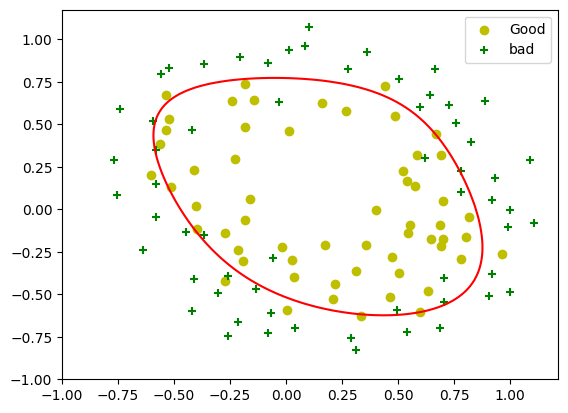

In [111]:
plotDDB(theta, X_map, y)
plt.show()